In [55]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import altair as alt
import numpy as np

In [3]:
df = pd.read_csv("population.csv")

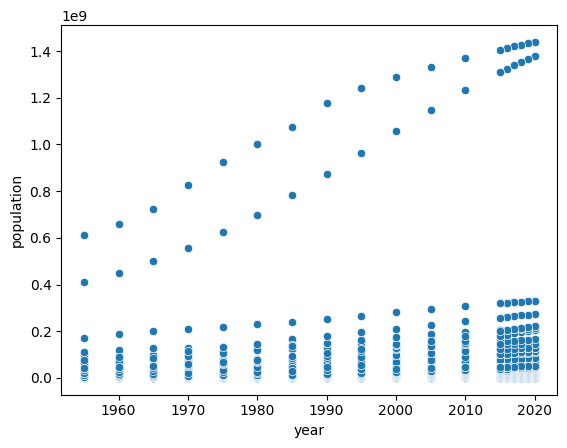

In [4]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax = sns.scatterplot(x="year", y="population", data = df)
plt.show()

In [5]:
fig = px.scatter(df,
                 x='population',
                 y='year',
                 color='country',
                 hover_name='country',
                 labels={'year': 'Year', 'population': 'Population'},
                 title='Population of Countries over Time')

fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=1980,
        dtick=10
    ),
    yaxis=dict(
        type='log',
        dtick=np.log10(1007),
        tickvals=[10 ** ((i * np.log10(1007)) + 3) for i in range(int(np.log10(max(df['population']) / 1007)) + 1)],
        ticktext=['{:,.0f}'.format(1007 * (10 ** (i * np.log10(1007)))) for i in
                  range(int(np.log10(max(df['population']) / 1007)) + 1)]
    )
)

In [6]:
fig = px.scatter(df,
                 x='year',
                 y='population',
                 color='country',
                 hover_name='country',
                 log_y=True,
                 range_x=[1980, 2020],
                 labels={'year': 'Year', 'population': 'Population'},
                 title='Population of Countries over Time')

fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=1980,
        dtick=10
    )
)

fig.show()

In [7]:
fig = px.scatter(df, x='year', y='population', color='country',
                 hover_name='country', labels={'year': 'Year', 'population': 'Population'},
                 title='Population of Countries over Time')

fig.update_layout(xaxis=dict(tickmode='linear', dtick=10))

fig.show()

In [35]:
fig = px.scatter(df,
                 x='year',
                 y='country',
                 size='population',
                 color='country',
                 hover_name='country',
                 animation_frame='year',
                 range_y=[df['country'].iloc[-1], df['country'].iloc[0]],
                 height=800)

fig.update_layout(title_text='Population Bubble Plot')
fig.show()

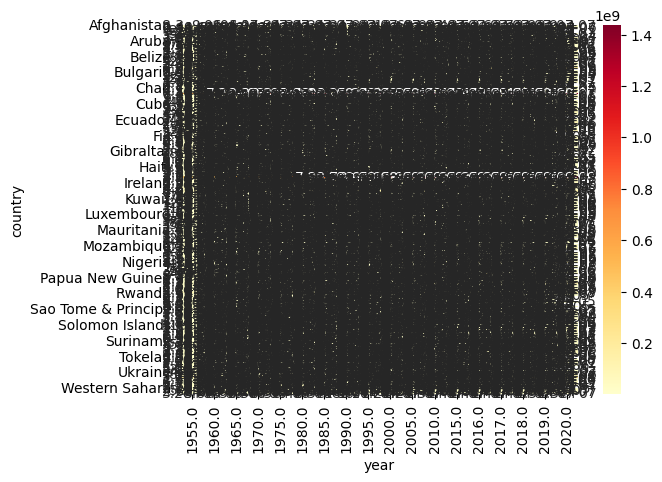

In [44]:
df = df.groupby(['country', 'year']).mean().reset_index()

heatmap_data = df.pivot('country', 'year', 'population')
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd')
fig = px.imshow(heatmap_data.transpose(), labels=dict(x="Country", y="Year", color="Population"))
fig.show()

In [41]:

heatmap = alt.Chart(df).mark_rect().encode(
    alt.X('year:O', title='Year'),
    alt.Y('country:O', title='Country'),
    alt.Color('population:Q', title='Population')
).properties(
    width=600,
    title='Population Heatmap'
)

heatmap

alt.Chart(...)

In [47]:
fig = px.line(df.query("country != ''"), x="year", y="population", color='country')
fig.update_traces(mode='lines+markers')
fig.show()

In [52]:

scat = px.scatter(df, x = 'year', y = 'population', color = 'country', marginal_y = 'box')
scat.show()

In [53]:

fig = px.box(df, x='country', y='population', title='Population Box Plot',
             labels={'country': 'Country', 'population': 'Population'})

fig.update_traces(hovertemplate='Population: %{y}<extra></extra>')
fig.update_layout(xaxis={'type': 'category', 'categoryorder': 'total descending'})

fig.show()

In [56]:

fig = px.line(df, x='year', y='population', color='country',
              labels={'year': 'Year', 'population': 'Population'},
              title='Population Trend')

fig.update_layout(xaxis={'type': 'category'},
                  sliders=[{
                      'active': len(df['year'])-1,
                      'currentvalue': {'prefix': 'Year: '},
                      'steps': [{'label': str(year), 'method': 'update', 'args': [{'visible': df['year'] == year}]}
                                for year in df['year']]
                  }])

fig.show()

In [ ]:
fig = px.line(df,
              x='year',
              y='population',
              color='country',
              title='Population by Year')
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Population')
fig.show()